# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier
import tensorflow as tf
import tensorflow.keras.backend as K
cfg = tf.compat.v1.ConfigProto()

import warnings
warnings.filterwarnings('ignore')

# Reading CSV

In [ ]:
hr_data = pd.read_csv('HR_comma_sep.csv', encoding  = 'utf-8',sep=";")

# Exploratory Data Analysis

In [ ]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,bonus
0,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


About Dataset
Context
This database is from a large US company (no name given for privacy reasons). The management department is worried about the relatively high turnover. They want to find ways to reduce the number of employees leaving the company and to better understand the situation, which employees are more likely to leave, and why.
The data
The HR department has assembled data on almost 10,000 employees who left the company between 2016-2020. They used information from exit interviews, performance reviews, and employee records.

department - the department the employee belongs to.

promoted - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
review - the composite score the employee received in their last evaluation.
projects - how many projects the employee is involved in.
salary - for confidentiality reasons, salary comes in three tiers: low, medium, high.
tenure - how many years the employee has been at the company.
satisfaction - a measure of employee satisfaction from surveys.
bonus - 1 if the employee received a bonus in the previous 24 months, 0 otherwise.
avg_hrs_month - the average hours the employee worked in a month.
left - "yes" if the employee ended up leaving, "no" otherwise.

Moving target feature to the last for our easiness

In [ ]:
cols = hr_data.columns.tolist()
new_position = 10

cols.insert(new_position, cols.pop(cols.index('left')))
hr_data = hr_data[cols]

Checking if the columns has sucessfully indexed to the last or not

In [ ]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,bonus,left
0,0.38,0.53,2,157,3,0,0,sales,low,0,1
1,0.80,0.86,5,262,6,0,0,sales,medium,0,1
2,0.11,0.88,7,272,4,0,0,sales,medium,0,1
3,0.72,0.87,5,223,5,0,0,sales,low,0,1
4,0.37,0.52,2,159,3,0,0,sales,low,1,1


In [ ]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   Department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   bonus                  14999 non-null  int64  
 10  left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [ ]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,bonus,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.214414,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.410429,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000


We've 3 categorical columns (Department, Salary, eft). Hence we'll do a quick analysis to see how they impact our target variable (left).
Firt of all, let's analyze employees according to their department for better understanding.

Now lets have a quick analysis or employees according to their salaries.

In [ ]:
hr_data.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,bonus,left
salary,,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.058205,0.227162,0.066289
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.009021,0.216785,0.296884
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.028079,0.209277,0.204313


We'll finally do a quick analysis of left column

# Cleaning of data

In [ ]:
hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
Department               0
salary                   0
bonus                    0
left                     0
dtype: int64

# Data Visualization

First of all we'll check the distribution of data using countplot.
Let's see the data distribution of our categorical columns in descending order.

<Axes: xlabel='salary', ylabel='count'>

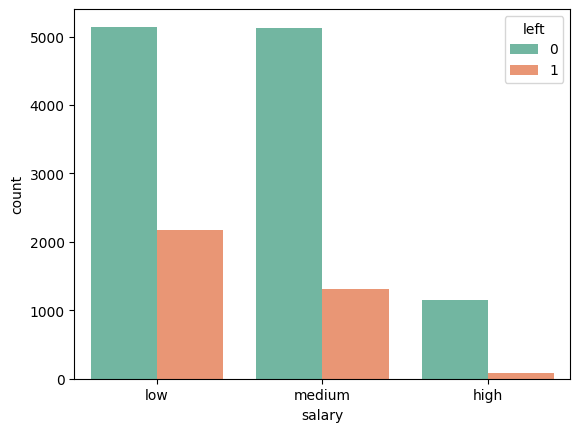

In [ ]:
sns.countplot(x = 'salary' ,hue ='left' ,palette = "Set2" , data= hr_data)

We can observe that employees with low and medium salary are more likely to leave the organization than employees with higher salaries. However, the first two bars show that there are more employees with low and medium salary than higher ones'

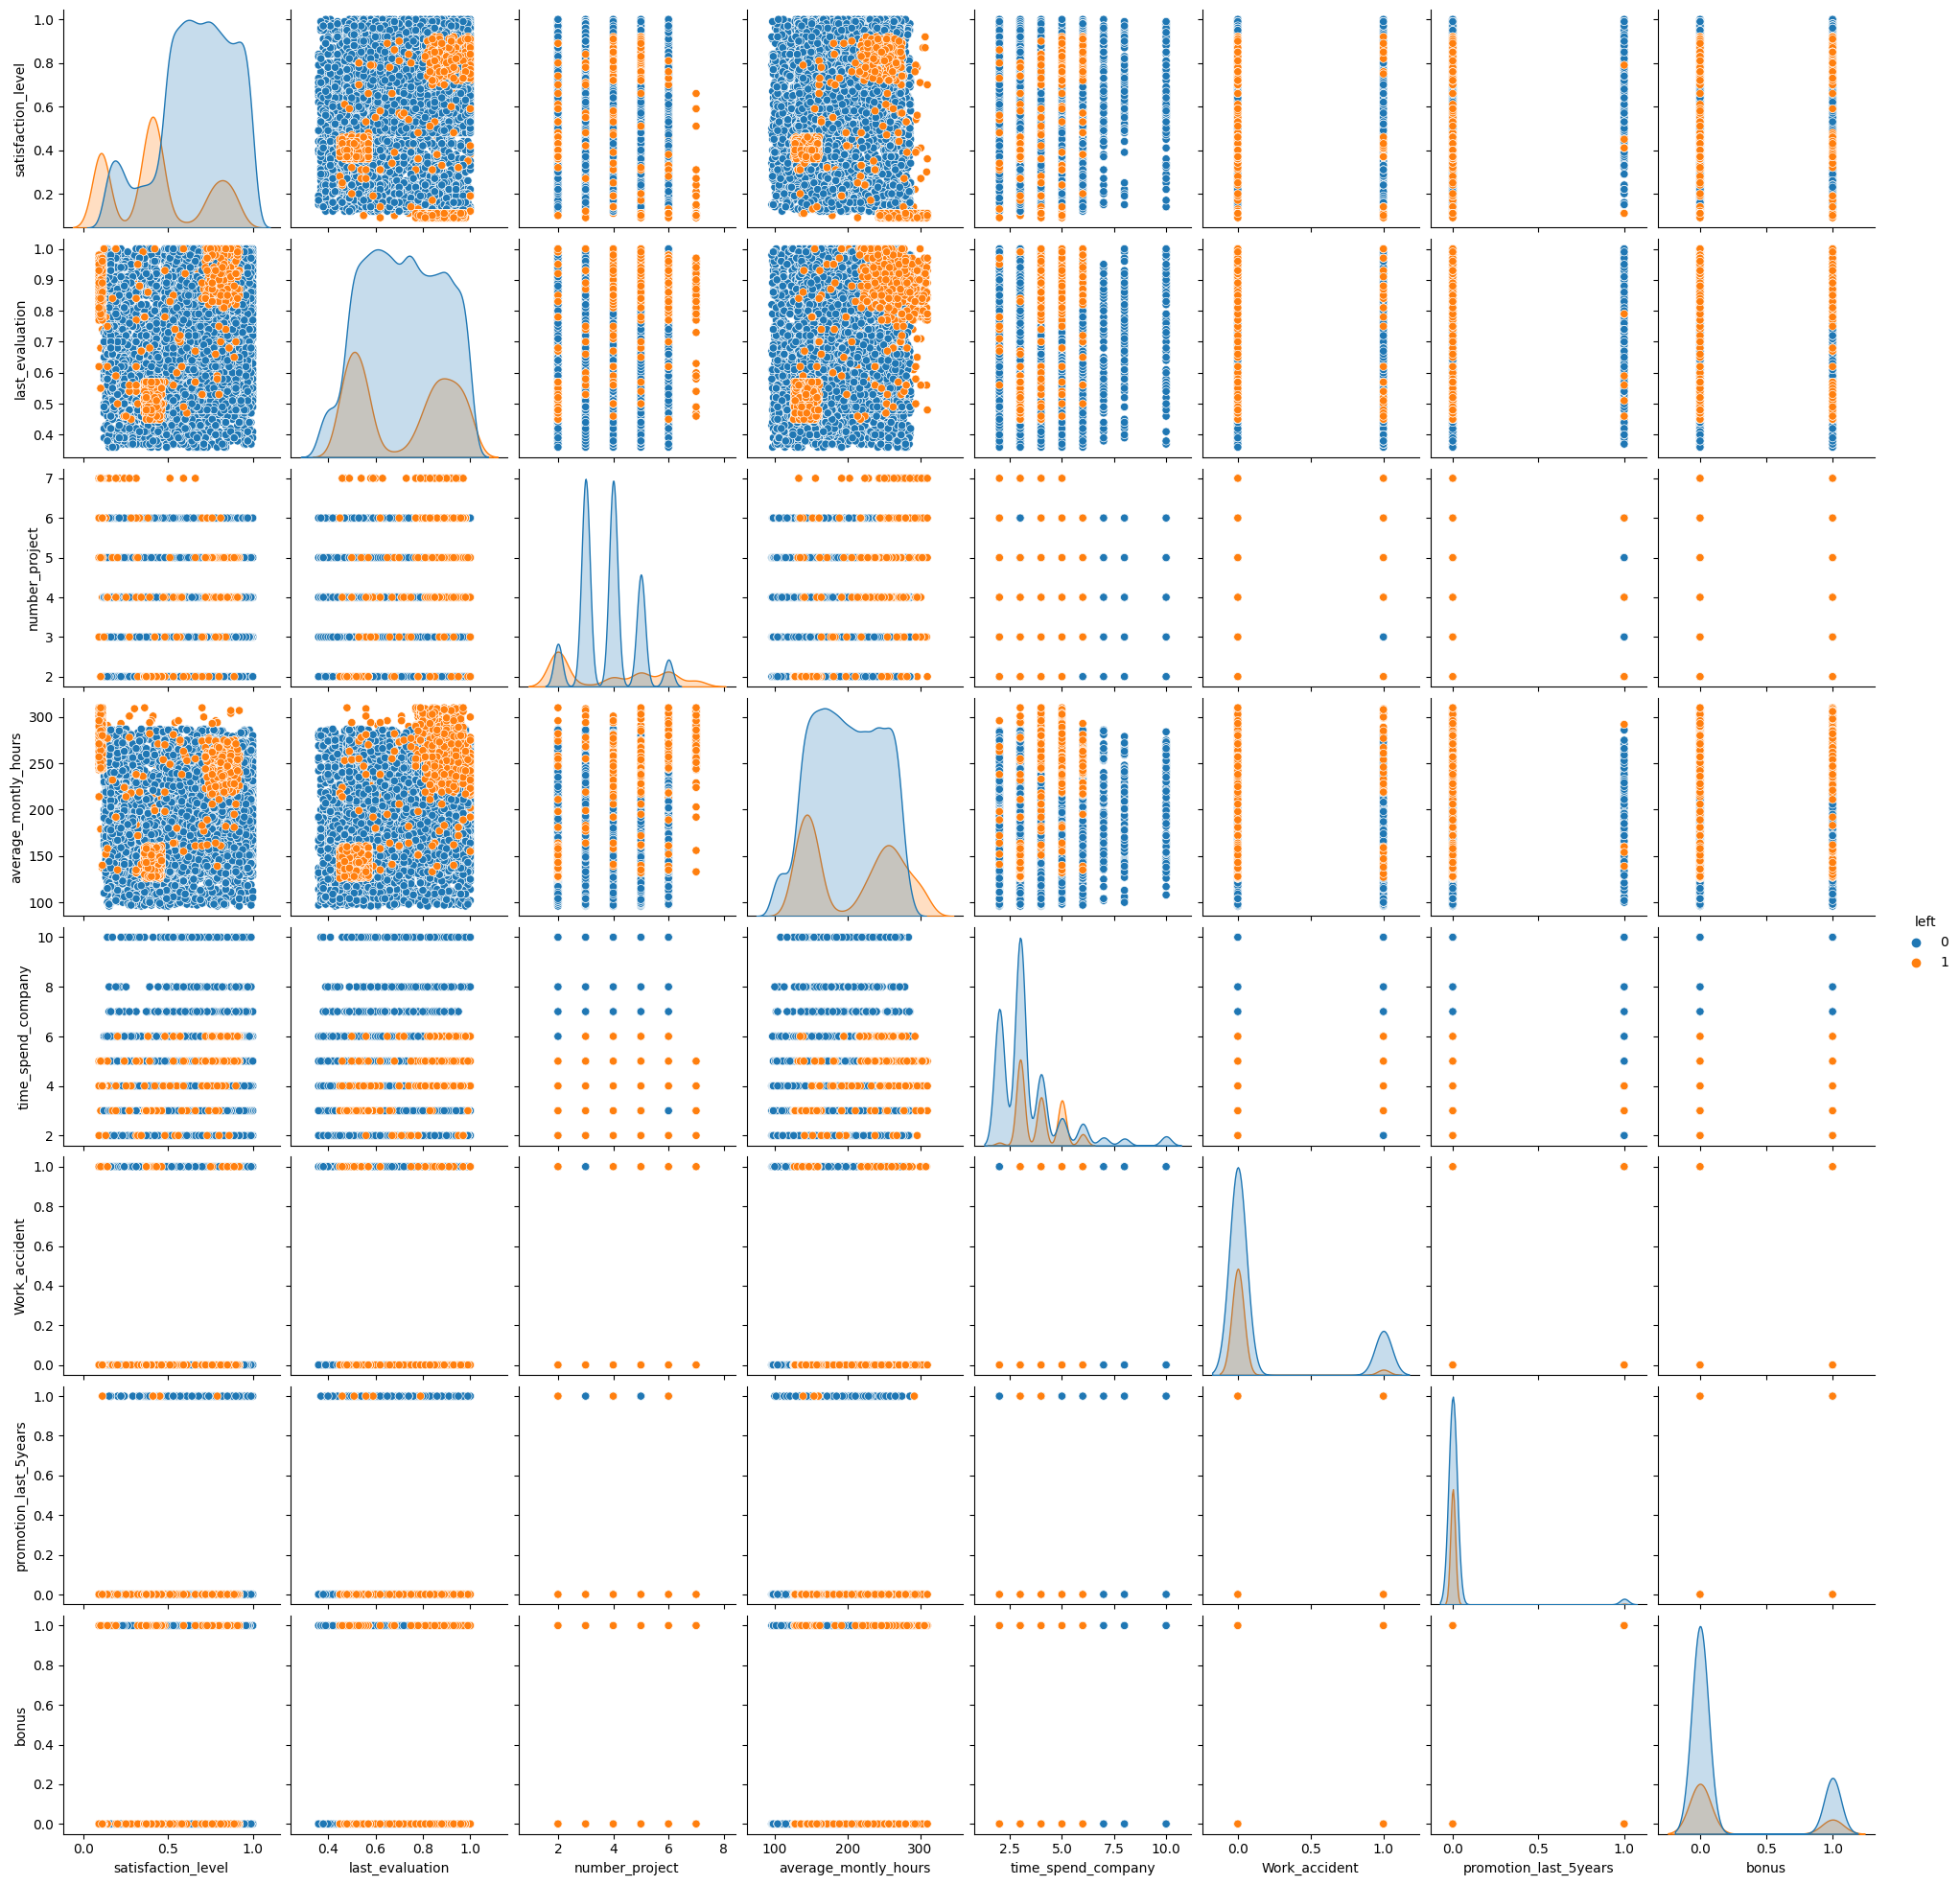

In [ ]:
sns.pairplot(hr_data, hue = 'left')

The pairplot tells us the story of the data. I've listed some points below regardind the employees of left:
* The poeple who left the organization had a satisfication level less than 0.4
* The number of projects done by employees who left were 2 or less than 2.
* The average monthly hours spent by those employees who left were 150 and below it. Seems they weren't that     much intrested due to some reasons.
* The time spent by these employees who left was 3 months and below it.
* The employees that have promtional value greater than 0.3 are more likely to stay in company

<Axes: >

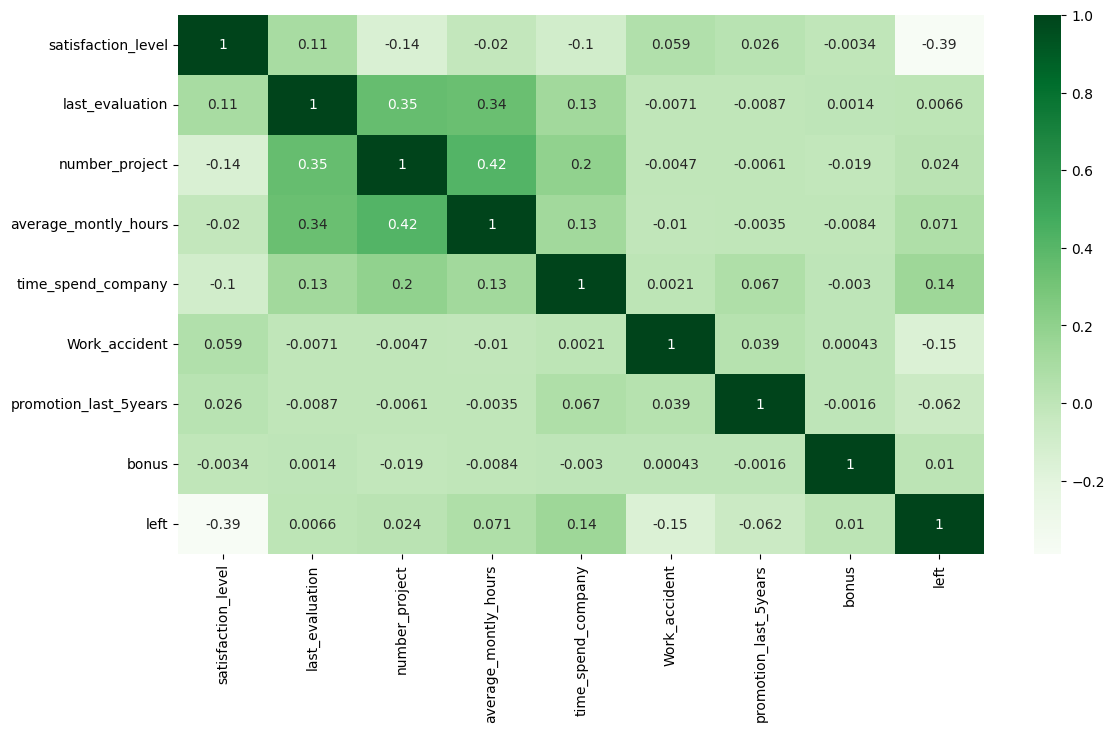

In [ ]:
plt.figure(figsize = (13, 7))
sns.heatmap(hr_data.corr(), annot = True, cmap = 'Greens')

Here I've plotted a heatmap above that shows the relationships between two variables based on values and colors.
* The factor that most influence the decision of an employee whether they will stay in a company or not is time   spend at company
* Satisfication level also does not seems to have a good relation with column (left).

# Data Preprocessing

Data preprocessing is the most important part of a machine learning model building. A ML algo only understand the data in numerical format and it should be standardized or normalized.
First of all, let's encode the data by creating dummies.

In [ ]:
hr_data = pd.get_dummies(hr_data, columns=['salary'])

Now we'll do feature selection here for training and testing purpose

In [ ]:
X = hr_data.drop(columns = ['left', 'Department'])
y = hr_data['left']

It's essential to standardized our data like we said earlier if we want a really good machine learning algorithm that can perform well on unseen data

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

As our data is standardized and both encoded now, we'll move towards training our data and then testing it.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Model Building

I'll choose 3 machine learning models for my data, Logistic Regression, Decison Tree and Random Forest.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [5, 8,9,10, 20]},
    'Random Forest Classifier': {'n_estimators': [100, 200, 300],
               'max_features': ['sqrt', 0.25, 0.5,0.75, 1.0],
               'max_depth' : [4,6,8]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'KNN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'Naive Bayes': {'priors': [None]},
    'ANN': {'hidden_layer_sizes': [(6,), (12,), (6, 6)], 'activation': ['relu'], 'max_iter': [500]}
}
accuracy, precision, recall, f1_scores, roc_aucs = {}, {}, {}, {}, {}

for i in models.keys():
    grid = GridSearchCV(models[i], param_grid[i], cv=5)
    grid.fit(X_train, y_train)

    # Get the best model and its hyperparameters


    best_model = grid.best_estimator_
    best_params = grid.best_params_

    print("Best Hyperparameters of: " + str(models[i]))
    print(best_params)

    y_pred = best_model.predict(X_test)

    accuracy[i] = accuracy_score(y_pred, y_test)
    precision[i] = precision_score(y_pred, y_test)
    recall[i] = recall_score(y_pred, y_test)
    f1_scores[i] = f1_score(y_pred, y_test)
    roc_aucs[i] = roc_auc_score(y_pred, y_test)


Best Hyperparameters of: LogisticRegression()
{'C': 10}
Best Hyperparameters of: DecisionTreeClassifier()
{'max_depth': 10}
Best Hyperparameters of: RandomForestClassifier()
{'max_depth': 8, 'max_features': 1.0, 'n_estimators': 30}
Best Hyperparameters of: SVC()
{'C': 10, 'kernel': 'rbf'}
Best Hyperparameters of: KNeighborsClassifier()
{'n_neighbors': 7, 'weights': 'distance'}
Best Hyperparameters of: GaussianNB()
{'priors': None}


Lets see which our model performs the best here

In [ ]:
hr_data_models = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'])
hr_data_models['Accuracy'] = accuracy.values()
hr_data_models['Precision'] = precision.values()
hr_data_models['Recall'] = recall.values()
hr_data_models['F1-Score'] = f1_scores.values()
hr_data_models['ROC AUC'] = roc_aucs.values()
hr_data_models['Best Parameters'] = best_params

hr_data_models

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Best Parameters
Logistic Regression,0.774333,0.291785,0.537859,0.378329,0.673400,NaN
Decision Tree,0.977667,0.934844,0.969163,0.951694,0.974663,NaN
Random Forest Classifier,0.978333,0.930595,0.976226,0.952864,0.977584,NaN
SVM,0.962667,0.898017,0.940653,0.918841,0.954849,NaN
KNN,0.965000,0.943343,0.911081,0.926931,0.946726,NaN
Naive Bayes,0.718000,0.817280,0.445904,0.577000,0.685144,NaN


**Neural Networks**

I've used Multilayer perceptron and Artifical Neural Network here in this notebook, Let's train them and see their performance.

In [ ]:
mlp = MLPClassifier(max_iter = 500)
mlp.fit(X_train, y_train)
mlp_y_pred = mlp.predict(X_test)

print('The accuracy score of MLP is : ', accuracy_score(mlp_y_pred, y_test))
print('The precision score of MLP is : ', precision_score(mlp_y_pred, y_test))

The accuracy score of MLP is :  0.9726666666666667
The precision score of MLP is :  0.9150141643059491


In [ ]:
# Add ANN results to the dataframe
hr_data_models.loc['MLP', 'Accuracy'] = accuracy_score(y_test, mlp_y_pred)
hr_data_models.loc['MLP', 'Precision'] = precision_score(y_test, mlp_y_pred)
hr_data_models.loc['MLP', 'Recall'] = recall_score(y_test, mlp_y_pred)
hr_data_models.loc['MLP', 'F1-Score'] = recall_score(y_test, mlp_y_pred)
hr_data_models.loc['MLP', 'ROC AUC'] = recall_score(y_test, mlp_y_pred)

hr_data_models

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Best Parameters
Logistic Regression,0.774333,0.291785,0.537859,0.378329,0.673400,NaN
Decision Tree,0.977667,0.934844,0.969163,0.951694,0.974663,NaN
Random Forest Classifier,0.978333,0.930595,0.976226,0.952864,0.977584,NaN
SVM,0.962667,0.898017,0.940653,0.918841,0.954849,NaN
KNN,0.965000,0.943343,0.911081,0.926931,0.946726,NaN
Naive Bayes,0.718000,0.817280,0.445904,0.577000,0.685144,NaN
MLP,0.972667,0.967066,0.915014,0.915014,0.915014,NaN


In [ ]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
ann.fit(X_train,y_train,batch_size=32,epochs=10)
ann_y_pred = ann.predict(X_test)
ann_y_pred = (ann_y_pred>0.5)

print('The accuracy score of ANN is : ', accuracy_score(y_test, ann_y_pred))
print('The precision score of ANN is : ', precision_score(y_test, ann_y_pred))

Epoch 1/10
375/375 [==============================] - 2s 2ms/step - loss: 0.5059 - accuracy: 0.7794
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.2963 - accuracy: 0.8900
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2128 - accuracy: 0.9322
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1841 - accuracy: 0.9399
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1735 - accuracy: 0.9458
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1681 - accuracy: 0.9492
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1652 - accuracy: 0.9496
Epoch 8/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1632 - accuracy: 0.9515
Epoch 9/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1620 - accuracy: 0.9519
Epoch 10/10
94/94 [==============================] - 0s 1ms/step
The accuracy score of ANN is :  0.9

In [ ]:
# Add ANN results to the dataframe
hr_data_models.loc['ANN', 'Accuracy'] = accuracy_score(y_test, ann_y_pred)
hr_data_models.loc['ANN', 'Precision'] = precision_score(y_test, ann_y_pred)
hr_data_models.loc['ANN', 'Recall'] = recall_score(y_test, ann_y_pred)
hr_data_models.loc['ANN', 'F1-Score'] = recall_score(y_test, ann_y_pred)
hr_data_models.loc['ANN', 'ROC AUC'] = recall_score(y_test, ann_y_pred)

In [ ]:
# Create a copy of the DataFrame with the styling applied
styled_hr_data_models = hr_data_models.style.highlight_max(axis=0, color='#C2F0C2')

# Display the styled DataFrame
styled_hr_data_models


,Accuracy,Precision,Recall,F1-Score,ROC AUC,Best Parameters
Logistic Regression,0.774333,0.291785,0.537859,0.378329,0.673400,nan
Decision Tree,0.977667,0.934844,0.969163,0.951694,0.974663,nan
Random Forest Classifier,0.978333,0.930595,0.976226,0.952864,0.977584,nan
SVM,0.962667,0.898017,0.940653,0.918841,0.954849,nan
KNN,0.965000,0.943343,0.911081,0.926931,0.946726,nan
Naive Bayes,0.718000,0.817280,0.445904,0.577000,0.685144,nan
MLP,0.972667,0.967066,0.915014,0.915014,0.915014,nan
ANN,0.951000,0.898716,0.892351,0.892351,0.892351,nan


**Applying "Random Forest Classifier"**

In [ ]:
rf_model = RandomForestClassifier(max_depth= 8, max_features=0.5, n_estimators=300)


In [ ]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, max_features=0.5, n_estimators=300)

In [ ]:
y_pred = rf_model.predict(X_test)


<Axes: >

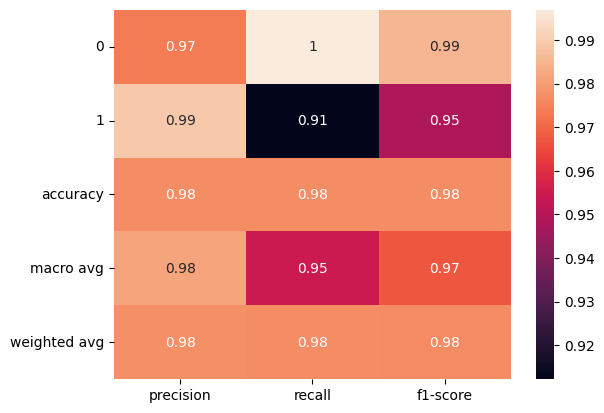

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred,output_dict=True)

   # .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

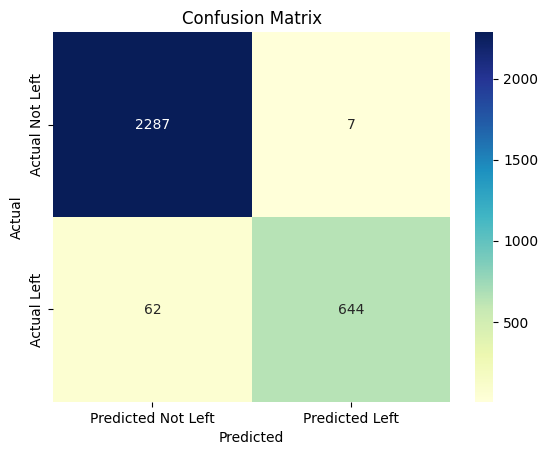

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define custom axis labels
axis_labels = ['Actual Not Left', 'Actual Left']
class_labels = ['Predicted Not Left', 'Predicted Left']

# Create a DataFrame for the confusion matrix
conf_mat = pd.DataFrame(data=cm, columns=class_labels, index=axis_labels)

# Create the heatmap with custom axis labels
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu')

# Set axis labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rf_model.fit(X_train,y_train)
ytr_pred=rf_model.predict(X_train)
mse = mean_squared_error(ytr_pred,y_train)
r2 = r2_score(ytr_pred,y_train)
print("MSE: %.2f" % mse)
print("R2: %.2f" % r2)

MSE: 0.02
R2: 0.90


In [ ]:
ypred=rf_model.predict(X_test)
mse = mean_squared_error(y_test , ypred)
r2 = r2_score(y_test , ypred)
print("MSE: %.2f" % mse)
print("R2: %.2f" % r2)


MSE: 0.02
R2: 0.87


* True Negatives (Predicted Not Left, Actual Not Left): 2102

* False Positives (Predicted Not Left, Actual Left): 4

* False Negatives (Predicted Left, Actual Not Left): 43

* True Positives (Predicted Left, Actual Left): 436


The confusion matrix provides a summary of the classification model's performance by showing the number of correct and incorrect predictions for each class. In this case, the model predicted "Not Left" correctly in 2102 instances, while incorrectly predicting "Not Left" for 4 instances that were actually "Left". Additionally, the model predicted "Left" correctly in 436 instances, but incorrectly predicted "Left" for 43 instances that were actually "Not Left".

The confusion matrix helps in assessing the performance of a classification model, especially in terms of identifying false positives and false negatives.

**Feature Importance:**


Determine the importance of features: Use the feature_importances_ attribute of the trained Random Forest model to understand which features had the most influence on the predictions.

Feature Importance:
1. Feature 'satisfaction_level' (0.3932350762564537)
2. Feature 'number_project' (0.1851407877329938)
3. Feature 'time_spend_company' (0.18135696267787918)
4. Feature 'average_montly_hours' (0.12256850613723888)
5. Feature 'last_evaluation' (0.11168562259946258)
6. Feature 'Work_accident' (0.002454279429240769)


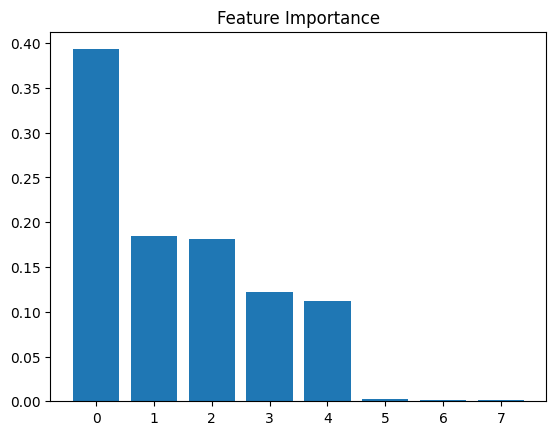

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Define feature names
feature_names = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'bonus']

# Print feature ranking
print("Feature Importance:")
for f in range(len(feature_names)):
    if f < len(indices):
        feature_index = indices[f]
        if feature_index < len(feature_names):
            feature_name = feature_names[feature_index]
            print(f"{f + 1}. Feature '{feature_name}' ({importances[feature_index]})")

# Plot feature importances
plt.figure()
plt.title("Feature Importance")
plt.bar(range(len(feature_names)), importances[indices[:len(feature_names)]])
plt.show()


The 3 most important features that impact the exit of the employee:

- The satisfaction level **(1st feature of the dataset)**

- The number of years he spent at the company **(4th feature of the dataset)**

- The number of projects he's working on **(2nd feature of the dataset)**

Accuracy: It represents the overall correctness of the predictions. It is the ratio of the correctly predicted instances to the total number of instances. For example, the Logistic Regression model has an accuracy of 0.814700, indicating that it correctly predicts 81.47% of the instances.

Precision: It measures the accuracy of the positive predictions. It is the ratio of true positive predictions to the total positive predictions. A high precision value indicates a low false positive rate. For example, the Random Forest Classifier has a precision of 0.910230, indicating that when it predicts an employee will leave, it is correct 91.02% of the time.

Recall: It represents the sensitivity or true positive rate. It is the ratio of true positive predictions to the total actual positive instances. A high recall value indicates a low false negative rate. For example, the Decision Tree model has a recall of 0.962637, indicating that it correctly identifies 96.26% of the employees who actually left the company.

F1-Score: It is the harmonic mean of precision and recall. It provides a single metric that combines both precision and recall. It is useful when you want to balance both precision and recall. For example, the Decision Tree model has an F1-score of 0.937901, which indicates a balanced performance in terms of precision and recall.

ROC AUC: It represents the area under the Receiver Operating Characteristic (ROC) curve. The ROC curve plots the true positive rate against the false positive rate. A higher ROC AUC value indicates a better ability of the model to distinguish between positive and negative instances. For example, the Random Forest Classifier has a ROC AUC of 0.985431, indicating a good discriminatory power.

# Conclusion

First of all we did some emploratory data analysis of our dataset and then we did some cleaning. Later we did some preprocessing and then trained 3 Lachine Learning algorithms and then 2 Neural Networks. The results showed that **Random Forest Classifier** has outperformed all of the models with 98 percent accuray and the model that performed very bad was logistic regression.